<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Curso de bases para AI - Universidad de Antioquia**


El presente curso hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

\

El curso será dictado en 16 sesiones o clases de 4 horas los días sábado en las instalaciones de la universidad. Para un total de dededicación temporal de 64 horas. El curso cuenta con los siguientes módulos:

1. Bases matemáticas y de programación. (10H)
2. Bases de Python. (19H)
3. Bases de R. (13H)
4. Procesamiento de datos. (22H)

#**dplyr**

La visualización es una herramienta importante para la generación de información, pero es raro que obtenga los datos exactamente en la forma correcta que necesita. A menudo necesitará crear algunas variables o resúmenes nuevos, o tal vez solo desee cambiar el nombre de las variables o reordenar las observaciones para que los datos sean un poco más fáciles de trabajar. La idea principal en esta sección es aprender cómo transformar sus datos utilizando el paquete **dplyr** y un nuevo conjunto de datos en vuelos que salen de la ciudad de Nueva York en 2013.

In [1]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



En esta sesión nos centraremos en cómo usar el paquete **dplyr**, otro miembro central del **tidyverse**. Ilustraremos las ideas clave utilizando los datos del paquete nycflights13 y usaremos **ggplot2** para ayudarnos a comprender los datos.

In [3]:
library(nycflights13)
library(tidyverse)

Tome nota cuidadosamente del mensaje de conflictos que se imprime cuando carga el **tidyverse**. Le dice que **dplyr** sobrescribe algunas funciones en la base R. Si desea usar la versión base de estas funciones después de cargar **dplyr**, deberá usar sus nombres completos: `stats::filter()` y `stats::lag()`.




## **nycflights13**

Para explorar los verbos básicos de manipulación de datos de **dplyr**, usaremos `nycflights13::vuelos`. Este data frame contiene los 336,776 vuelos que partieron de la ciudad de Nueva York en 2013. Los datos provienen de la Oficina de Estadísticas de Transporte de EE. UU. Y están documentados en `?flights`

In [4]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [5]:
nrow(flights)

[1] 336776

### **funciones dplyr** 

Existen 5 funciones que permiten resolver la basta mayoría de los retos de manipulación de datos :

- Seleccionar por sus valores (`filter()`)
- Reordenar filas (`arange()`)
- Seleccionar variables o columnas por sus nombres (`select()`)
- Crear variables como funciones de las variables ya existentes(`mutate()`)
- Contraiga muchos valores a un solo resumen (`summaryize()`).

Todos estos pueden usarse junto con `group_by()`, que cambia el alcance de cada función desde operar en todo el conjunto de datos hasta operar en grupo por grupo. Estas seis funciones proporcionan los verbos para un lenguaje de manipulación de datos.

Todos los verbos funcionan de manera similar:

1. El primer argumento es el data-frame.
2. Los argumentos posteriores describen qué hacer con el data-frame, utilizando los nombres de las variables (sin comillas).
3. El resultado esun nuevo data-frame.

En conjunto, estas propiedades hacen que sea fácil encadenar múltiples pasos simples para lograr un resultado complejo. Vamos a sumergirnos y ver cómo funcionan estos verbos.

### **Filtros con filter()**
`filter ()` le permite subconjugar observaciones en función de sus valores. El primer argumento es el nombre del marco de datos. El segundo argumento y los posteriores son las expresiones que filtran el marco de datos. Por ejemplo, podemos seleccionar todos los vuelos el 1 de enero con:

In [6]:
head(filter(flights, month == 1, day == 1))
nrow((filter(flights, month == 1, day == 1)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


[1] 842

Cuando ejecuta esa línea de código, **dplyr** ejecuta la operación de filtrado y devuelve una vista del data-frame. Las funciones **dplyr** nunca modifican sus entradas, por lo que si desea guardar el resultado, deberá usar el operador de asignación, <-:

In [9]:
jan1 <- filter(flights, month == 1, day == 1)
nrow(jan1)

[1] 842

R imprime los resultados o los guarda en una variable. Si desea hacer ambas cosas, puede ajustar la asignación entre paréntesis:

In [10]:
(dec25 <- filter(flights, month == 12, day == 25))
nrow(dec25)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,25,456,500,-4,649,651,-2,US,1895,N156UW,EWR,CLT,98,529,5,0,2013-12-25 05:00:00
2013,12,25,524,515,9,805,814,-9,UA,1016,N32404,EWR,IAH,203,1400,5,15,2013-12-25 05:00:00
2013,12,25,542,540,2,832,850,-18,AA,2243,N5EBAA,JFK,MIA,146,1089,5,40,2013-12-25 05:00:00
2013,12,25,546,550,-4,1022,1027,-5,B6,939,N665JB,JFK,BQN,191,1576,5,50,2013-12-25 05:00:00
2013,12,25,556,600,-4,730,745,-15,AA,301,N3JLAA,LGA,ORD,123,733,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,743,752,-9,DL,731,N369NB,LGA,DTW,88,502,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,818,831,-13,DL,904,N397DA,LGA,ATL,118,762,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,855,856,-1,B6,371,N608JB,LGA,FLL,147,1076,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,849,855,-6,B6,605,N536JB,EWR,FLL,149,1065,6,0,2013-12-25 06:00:00


[1] 719

Para utilizar el filtrado de manera efectiva, debe saber cómo seleccionar las observaciones que desea utilizando los operadores de comparación. R proporciona el conjunto estándar: 

- `>`
- `> =`
- `<`
- `<=`
- `! =` (No es igual)
- `== (igual)`.

Sin embargo, hay un problema común que puede encontrar al usar `==`: números de punto flotante. ¡Estos resultados pueden sorprenderte!

In [11]:
sqrt(2)^2 == 2

1/49 * 49 == 1


[1] FALSE

[1] FALSE

Las computadoras usan aritmética de precisión finita (¡obviamente no pueden almacenar un número infinito de dígitos!), Así que recuerde que cada número que ve es una aproximación. En lugar de confiar en `==`, use `near ()`:

In [12]:
near(sqrt(2) ^ 2, 2)

near(1 / 49 * 49, 1)


[1] TRUE

[1] TRUE

Podemos usar los operadores lógicos como múltiples argumentos de la función `filter()`. Recuerde que `&` es “and,” `|` es “or,” y `!` es “not.”. Es importante recordar que estos funcionan así


![Imagen modificada de Wikipedia](https://github.com/tomasate/Curso0/blob/master/Img13.PNG?raw=true)
</center>

Busquemos entonces todos los vuelos de noviembre y diciembre.



In [13]:
head(filter(flights, month == 11 | month == 12))
nrow((filter(flights, month == 11 | month == 12)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


[1] 55403

El orden de las operaciones no funciona como el inglés. No puede escribir `filter(flights, month == 11 | 12)`, que podría traducir literalmente en "encuentra todos los vuelos que partieron en noviembre o diciembre". En cambio, encuentra todos los meses que equivalen a `11 | 12`, una expresión que se evalúa como `TRUE`. En un contexto numérico (como aquí), `TRUE` se convierte en uno, por lo que encuentra todos los vuelos en enero, no en noviembre o
Diciembre. ¡Esto es bastante confuso!

In [14]:
head(filter(flights, month == 11 | 12))
nrow(filter(flights, month == 11 | 12))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


[1] 336776

Una abreviatura útil para este problema es `x %in% y`. Esto seleccionará cada fila donde x es uno de los valores en y. Podríamos usarlo para reescribir el código anterior:

In [15]:
head(nov_dec <- filter(flights, month %in% c(11, 12)))
nrow(nov_dec)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


[1] 55403

A veces, puede simplificar los subconjuntos complicados recordando la ley de De Morgan:

- `!(x & y)` es lo mismo que `!x |!y`, 
- `!(x | y)` es lo mismo que `!x & !y`. 

Por ejemplo, si desea encontrar vuelos que no se retrasaron (bien sea a la llegada o salida) en más de dos horas, puede usar cualquiera de los dos filtros siguientes:

In [16]:
#filter(flights, !(arr_delay > 120 | dep_delay > 120))
filter(flights, arr_delay <= 120, dep_delay <= 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Siempre que empiece a usar expresiones complicadas y de varias partes en `filter()`, considere hacerlas explícitas en su lugar. Eso hace que sea mucho más fácil verificar tu trabajo.

###**Valores Faltantes**

Una característica importante de R que puede dificultar la comparación es la falta de valores o NA ("not available"). NA representa un valor desconocido, por lo que los valores faltantes son "contagiosos"; casi cualquier operación que implique un valor desconocido también será desconocida:

In [17]:
NA > 5

10 == NA

NA + 10

NA / 2

NA == NA

[1] NA

[1] NA

[1] NA

[1] NA

[1] NA

Si uno quiere saber si un valor es `NA` puede usar la función `is.na()`

In [18]:
x <- 5L
y <- NA
is.na(y)

[1] TRUE

`filter()` solo incluye filas donde la condición es `TRUE`; excluye los valores `FALSE` y `NA`. Si desea conservar los valores faltantes, solicítelos explícitamente:

In [20]:
df <- tibble(x = c(1, NA, 3)) # tibble es una versión abreviada de data.frame
df
#filter(df, x > 1)

x
<dbl>
1
NA
3


In [21]:
filter(df, x > 1)

x
<dbl>
3


In [22]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


##**Ejercicios**
Encuentre los vuelos que:

###**1)**
Tuvieron una llegada dilatada por 2 o más horas.

In [ ]:
#@title **Consulte la Respuesta Acá**
if (F){
  filter(flights, arr_delay >= 120)
}

###**2)**
Volaron hacia Houston (`IAH`,`HOU`)

In [ ]:
#@title **Consulte la Respuesta Acá**
if (F){

  filter(flights, dest == 'IAH' | dest == 'HOU')
}

### **3)**
Fueron operados por United, American, o Delta. 

Hint: Lea la ayuda con `?flights` para ver qué es `airlines`.



In [ ]:
airlines

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


In [ ]:
#@title **Consulte la Respuesta Acá**
if(F){
filter(flights, carrier %in% c('AA', 'UA', 'DL') )
}

### **3)**
Volaron en verano(Junio, Julio y Agosto )

In [ ]:
#@title **Consulte la Respuesta Acá**
if(F){
  filter(flights, month %in% c(6,7,8))
}

### **4)**
Llegaron más de dos horas tarde, pero no salieron tarde

In [ ]:
#@title **Consulte la Respuesta Acá**
if(T){
  filter(flights, arr_delay >=120 & dep_delay <=0 )
}

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,27,1419,1420,-1,1754,1550,124,MQ,3728,N1EAMQ,EWR,ORD,135,719,14,20,2013-01-27 14:00:00
2013,10,7,1350,1350,0,1736,1526,130,EV,5181,N611QX,LGA,MSN,117,812,13,50,2013-10-07 13:00:00
2013,10,7,1357,1359,-2,1858,1654,124,AA,1151,N3CMAA,LGA,DFW,192,1389,13,59,2013-10-07 13:00:00
2013,10,16,657,700,-3,1258,1056,122,B6,3,N703JB,JFK,SJU,225,1598,7,0,2013-10-16 07:00:00
2013,11,1,658,700,-2,1329,1015,194,VX,399,N629VA,JFK,LAX,336,2475,7,0,2013-11-01 07:00:00
2013,3,18,1844,1847,-3,39,2219,140,UA,389,N560UA,JFK,SFO,386,2586,18,47,2013-03-18 18:00:00
2013,4,17,1635,1640,-5,2049,1845,124,MQ,4540,N721MQ,LGA,DTW,130,502,16,40,2013-04-17 16:00:00
2013,4,18,558,600,-2,1149,850,179,AA,707,N3EXAA,LGA,DFW,234,1389,6,0,2013-04-18 06:00:00
2013,4,18,655,700,-5,1213,950,143,AA,2083,N565AA,EWR,DFW,230,1372,7,0,2013-04-18 07:00:00


### **5)**
Salieron entre la media noche y las 6 a.m. (incluyendo)

In [ ]:
#@title **Consulte la Respuesta Acá**
if(F){
  filter(flights, dep_time <= 600)
}

##**Organizar filas con `arrange()`**

`arrange() `funciona de manera similar a `filter() `excepto que en lugar de seleccionar filas, cambia su orden. Se necesita un marco de datos y un conjunto de nombres de columna (o expresiones más complicadas) para ordenar. Si proporciona más de un nombre de columna, cada columna adicional se utilizará para romper los lazos en los valores de las columnas anteriores:

In [24]:
arrange(flights, year, month, day)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Podemos usar `desc()` para organiar en orden descendente.

In [25]:
arrange(flights, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00
2013,12,5,756,1700,896,1058,2020,878,AA,172,N5DMAA,EWR,MIA,149,1085,17,0,2013-12-05 17:00:00


Los `NA` siempre son guardados al final. Independientemente de que se aga de forma ascendente o descendente.

In [26]:
df <- tibble(x = c(5, 2, NA))
arrange(df, x)

x
<dbl>
2
5
NA


In [27]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


##**Ejercicio**
Ordenar vuelos para encontrar los vuelos más retrasados. Encuentra los vuelos que salieron antes.

In [ ]:
#@title **Consulte la Respuesta Acá**
if(F){
  arrange(flights,desc(dep_delay))
}

###**2)**
Cómo usar arange para poner los valores faltantes al inicio?

In [ ]:
#@title **Consulte la Respuesta Acá**
if (F){
  arrange(df,!is.na(x))
}

##**Selección de columnas con `select()`**

Dentro del uso de datasets nos podemos encontrar casos de cientos o miles de variables, por lo que resulta útil visualizar un conjunto reducido de variables de interés. La función `select()` nos permite realizar esta función en `R`, basándonos en los nombres de las variables. Veamos un pequeño ejemplo con el dataset `fligths` de R:

In [28]:
# Visualización del dataset completo flights:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Coomo puede observarse en la infomación desplegada, este dataset consta de 19 variables. Para seleccionar algunas pocas, invocamos la función `select()` de la forma

```
select(dataframe, colA, colB,...)
```
Por ejemplo, si en el dataset `flights` queremos visualizar las columnas `year`, `month` y `day`, hacemos


In [29]:
# Select columns by name
head(select(flights, year, month, day))

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


También podemos seleccionar las columnas entre `year` y `day` mediante el operador de seccionado `:`

In [30]:
head(select(flights, year:day))

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


Podemos usar la expresión anterior de forma excluyente, en donde pretendamos visualizar todas las columnas excepto las columnas seccionas. Para esto, debemos anteponer un menos a la sección:

In [31]:
head(select(flights, -(year:day)))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Existen varias funciones auxiliares que se pueden usar dentro de la función `select():`

- `starts_with("abc")`, las que comienzan por "abc".
- `ends_with("xyz")`, las que finalizan en “xyz”.
- `contains("ijk")`, las que contienen “ijk”.
- `matches("(.)\\1")` selecciona variables que satisfacen una expresión regular. El ejemplo anterior busca cualquier variable que contenga caracteres repetidos. Veremos más sobre esto en sesiones futuras.
- `num_range("x", 1:3)` busca `x1`, `x2`, and `x3``.

In [32]:
# Columnas empezando por t:
head(select(flights, starts_with("t")))

tailnum,time_hour
<chr>,<dttm>
N14228,2013-01-01 05:00:00
N24211,2013-01-01 05:00:00
N619AA,2013-01-01 05:00:00
N804JB,2013-01-01 05:00:00
N668DN,2013-01-01 06:00:00
N39463,2013-01-01 05:00:00


In [33]:
# Columnas terminando en time:
head(select(flights, ends_with("time")))

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<int>,<int>,<int>,<int>,<dbl>
517,515,830,819,227
533,529,850,830,227
542,540,923,850,160
544,545,1004,1022,183
554,600,812,837,116
554,558,740,728,150


In [34]:
?select

La función `select()` puede usarse para renombrar variables. Sin embargo, en ocaciones resulta poco útil ya que elimina todas las variables que no se menciona explicitamente. En su lugar, la función `rename()` realiza una mejor labor, ya que preserva todas las variables que no se mencionan de forma explicita:

In [35]:
head(rename(flights, tail_num = tailnum))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Otra opción es usar la función `select()` junto con la función auxiliar `everything()`. Lo anterior resulta útil si se tienen varias variables que quieren moverse en el dataset. Veamos esto:

In [36]:
head(select(flights, time_hour, air_time, everything()))

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


### **Ejercicio:** Para el siguiente ejercicio:

1. Instale la librería `gapminder` con el fin de cargar el dataset que lleva este nombre. Dicho dataset resumen características macroeconómicas de diferentes paises a lo largo de los años. Visualice los 6 primeros datos del dataframe.
2. En una sola línea de código selecciona las columnas `year`, `country`  y  `gdpPercap` y almacénelas en un dataframe que se llame `year_country_gdp`.

In [ ]:
#@title 1. Instalación de la librería, invocación y visualización del dataframe.
install.packages("gapminder")
library("gapminder")
head(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [ ]:
#@title 2. Almacenamiento de columnas seleccionadas en una variable:
year_country_gdp <- select(gapminder,year,country,gdpPercap)
head(year_country_gdp)

year,country,gdpPercap
<int>,<fct>,<dbl>
1952,Afghanistan,779.4453
1957,Afghanistan,820.8530
1962,Afghanistan,853.1007
1967,Afghanistan,836.1971
1972,Afghanistan,739.9811
1977,Afghanistan,786.1134


##**Adición de nuevas variables con `mutate()`**

Más allá de la selección de un conjunto de columnas, a menudo resulta necesario adicionar nuevas columnas a partir de operaciones en columnas existentes; esta tarea puede realizarse mediante la función `mutate()`; esta función siempre adiciona columnas nuevas al final del dataset.

Para el siguiente ejemplo, empecemos por crear un dataset con pocas características a partir del dataset de `flights`. Para ello, usemos varias de las funciones aprendidas en la sección anterior:

In [37]:
flights_sml <- select(flights,
year:day,
ends_with("delay"),
distance,
air_time
)

head(flights_sml)


year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


Por ejemplo:

- A partir de las columnas `array_delay` y `dep_delay` calculemos la ganancia o perdida en terminos de retrazos o adelantos.
- A partir de las columnas de `distance` (millas) y `air_time` (dada en minutos), calculemos la velocidad en `miles/h`

In [38]:
head(mutate(flights_sml,
gain = arr_delay - dep_delay,
speed = distance / air_time * 60))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731
2013,1,1,2,33,1089,160,31,408.3750
2013,1,1,-1,-18,1576,183,-17,516.7213
2013,1,1,-6,-25,762,116,-19,394.1379
2013,1,1,-4,12,719,150,16,287.6000


Lo anterior solo tiene efector de vidualización

In [39]:
head(flights_sml)

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


Nótese, además, que podemos hacer referencia a columnas recién creadas:

In [40]:
head(
  mutate(flights_sml,
  gain = arr_delay - dep_delay,
  hours = air_time/60,
  gain_per_hour = gain / hours
  )
)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,3.783333,2.378855
2013,1,1,4,20,1416,227,16,3.783333,4.229075
2013,1,1,2,33,1089,160,31,2.666667,11.625000
2013,1,1,-1,-18,1576,183,-17,3.050000,-5.573770
2013,1,1,-6,-25,762,116,-19,1.933333,-9.827586
2013,1,1,-4,12,719,150,16,2.500000,6.400000


Si se quiere mostrar solo variables creadas, debemos usar la función `transmute():`

In [41]:
head(
  transmute(
    flights,
    gain = arr_delay - dep_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours
  )
)

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
9,3.783333,2.378855
16,3.783333,4.229075
31,2.666667,11.625000
-17,3.050000,-5.573770
-19,1.933333,-9.827586
16,2.500000,6.400000


In [42]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


###**Ejercicio:**

En el dataframe de `gapminder`, cree una nueva variable calcule el gdp total y exprése la cantidad en billones de dólares. Ayuda 1 billon es 10^9.

In [45]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
library(gapminder)

In [47]:
#@title Desarrollo del ejercicio
gdp_new <- gapminder %>%
    mutate(gdp_billion=gdpPercap*pop/10^9)

gdp_new

country,continent,year,lifeExp,pop,gdpPercap,gdp_billion
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453,6.567086
Afghanistan,Asia,1957,30.332,9240934,820.8530,7.585449
Afghanistan,Asia,1962,31.997,10267083,853.1007,8.758856
Afghanistan,Asia,1967,34.020,11537966,836.1971,9.648014
Afghanistan,Asia,1972,36.088,13079460,739.9811,9.678553
Afghanistan,Asia,1977,38.438,14880372,786.1134,11.697659
Afghanistan,Asia,1982,39.854,12881816,978.0114,12.598563
Afghanistan,Asia,1987,40.822,13867957,852.3959,11.820990
Afghanistan,Asia,1992,41.674,16317921,649.3414,10.595902


### **Funciones útilies para creación de variables:**

Existen varias funciones útilies para la creación de nuevas variables que se pueden usar junto con `mutate()`. La propiedad principal es que la función debe ser vectorizada, en el sentido que debe tomar como entrada un vector y como salida un vector con el mismo número de valores. Alguna de las principales funciones son: 

- `Operadores aritméticos:` Todos estos operadores son vectorizados y usan lo que se conoce como reglas de reciclaje. Si un parámetro es más corto que otro, automáticamente los extenderá para que sean de la misma longitud. Lo anteriore resulta útil cuando uno de los argumentos es un solo número: `air_time/60`, `hours*60+minute`, etc Los operadores aritméticos también son útilies conjuntamente con las funciones de agregación que se estudiarán más adelante. Por ejemplo `x/(sum(x))` calculará la proporción respecto a un total, `y-mean(y)` calculará la diferencia al valor medio

- `Operadores aritméticos modulares (%/% y %%`): La división entera (`%/%`) y el residuo (`%%`) operaciones con módulos que se pueden realizar también de forma vectorizada. Mediante las operaciones modulares se puede divir un entero en partes. Por ejemplo, en el dataset `flights` se puede computar las horas y minutos de la variable `dep_time`:

In [ ]:
head(
  transmute(flights,
  dep_time,
  hour = dep_time %/% 100,
  minute = dep_time %% 100
  )
)

dep_time,hour,minute
<int>,<dbl>,<dbl>
517,5,17
533,5,33
542,5,42
544,5,44
554,5,54
554,5,54


Otras funciones útilies son:

- `Logs:` `log()`, `log2()`, `log10()`: Las transformaciones logarítmicas resultan especialmente útiles en el caso de datos que poseen varios ordenes de magnitud. También transforma una relación de múltiplicación en una relación aditiva. De las funciones enlistadas, la más facil de interpretar es `log2()` ya que es muy fácil de interpretar: Una diferencia de 1 en la escala logarítmica corresponde al doble de la escala original y una diferencia de $-1$ corresponde a la mitad.

- `Offsets`: `lead()` and `lag()` nos permite referirnos a valores iniciales o anteriores. Esto facilita el cálculo de diferencias (por ejemplo $x-\text{lag}(x)$), o buscar cuando cambian los valores ($x!=\text{lag}(x)$). Veamos un pequeño ejemplo:

In [ ]:
x = 1:10
x

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
lag(x)

[1] NA  1  2  3  4  5  6  7  8  9

In [ ]:
lead(x)

[1]  2  3  4  5  6  7  8  9 10 NA

###*Agregaciones de acumuación y Rolling*
R proporciona ffunciones para llevar a cabo sumas, profuces, mínimos, mácimos como `cumsum()`, `cumprod()`, `cummin()`, `cummax()`; además, **dplyr** proporciona `cummean()` para la acumulación de los valores medios. Si se necesitan agregados rodantes, por ejemplo, una suma que se computa dentro de una ventana rodante, puede usarse el paquete `RcppRoll`. Veamos algunos ejemplos: 

In [ ]:
cumsum(x)

[1]  1  3  6 10 15 21 28 36 45 55

In [ ]:
cumprod(x)

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

###*Comparaciones lógicas*

Si se está realizando un secuencia compleja de operaciones lógicas, es una buena idea almacenar los valores intermedios en nuevas variables para que pueda verificar que cada paso funcione de acuerdo a lo esperado. Para eso, podemos usar las operaciones lógicas <, <=, >, >=, !=.

###*Ranqueado*

Existen varias funciones de ranquedo. 


In [ ]:
y = c(1,3,5,7,9,11)
y

[1]  1  3  5  7  9 11

In [ ]:
min_rank(y)

[1] 1 2 3 4 5 6

In [ ]:
row_number(y)

[1] 1 2 3 4 5 6

In [ ]:
dense_rank(y)

[1] 1 2 3 4 5 6

In [ ]:
percent_rank(y)

[1] 0.0 0.2 0.4 0.6 0.8 1.0

# Operaciones de agrupamiento y agregación en R

Similar a Python, el objetivo de las funciones que vamos a ver acontinuación es permitirnos **dividir-aplicar-combinar** 

![texto alternativo](https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/s07/imagenes/group_process.png?raw=true)



Vamos a usar las bases de datos de `flights` y `pollution`

##Group_by()
Para agrupar tenemos la función:

```r
group_by(.data, ..., add = FALSE)
```

Y para desagrupar:

```r
ungroup(.data, ..., add = FALSE)
```


La función `group_by()` agrupa un conjunto de filas seleccionado en un conjunto de filas de resumen de acuerdo con los valores de una o más columnas o expresiones.

In [49]:
install.packages("maps")
library(maps)
devtools::install_github("rstudio/EDAWR")
library(EDAWR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map





forecast     (NA    -> 8.12       ) [CRAN]
babynames    (NA    -> 1.0.0      ) [CRAN]
isoband      (0.2.1 -> 0.2.2      ) [CRAN]
farver       (2.0.1 -> 2.0.3      ) [CRAN]
rprojroot    (1.2   -> 1.3-2      ) [CRAN]
processx     (3.4.1 -> 3.4.2      ) [CRAN]
zoo          (NA    -> 1.8-8      ) [CRAN]
quadprog     (NA    -> 1.5-8      ) [CRAN]
quantmod     (NA    -> 0.4.17     ) [CRAN]
xts          (NA    -> 0.12-0     ) [CRAN]
TTR          (NA    -> 0.23-6     ) [CRAN]
curl         (4.2   -> 4.3        ) [CRAN]
fracdiff     (NA    -> 1.5-1      ) [CRAN]
ggplot2      (3.3.1 -> 3.3.2      ) [CRAN]
lmtest       (NA    -> 0.9-37     ) [CRAN]
timeDate     (NA    -> 3043.102   ) [CRAN]
tseries      (NA    -> 0.10-47    ) [CRAN]
urca         (NA    -> 1.3-0      ) [CRAN]
RcppArmad... (NA    -> 0.9.900.1.0) [CRAN]


Installing 19 packages: forecast, babynames, isoband, farver, rprojroot, processx, zoo, quadprog, quantmod, xts, TTR, curl, fracdiff, ggplot2, lmtest, timeDate, tseries, urca, RcppArmadillo

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpqlL1OL/remotes785751b79b/rstudio-EDAWR-fbfee98/DESCRIPTION’
─  preparing ‘EDAWR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘EDAWR_0.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘EDAWR’


The following object is masked _by_ ‘.GlobalEnv’:

    y


The following object is masked from ‘package:dplyr’:

    storms


The following objects are masked from ‘package:tidyr’:

    population, who




In [50]:
pollution

city,size,amount
<chr>,<chr>,<dbl>
New York,large,23
New York,small,14
London,large,22
London,small,16
Beijing,large,121
Beijing,small,56


In [51]:
by_size <- group_by(pollution, size)

In [52]:
by_size

city,size,amount
<chr>,<chr>,<dbl>
New York,large,23
New York,small,14
London,large,22
London,small,16
Beijing,large,121
Beijing,small,56


Como podemos ver por si sola no hace mucho, pero al combinarla con `sumarise()` o `mutate()` podemos obtener tablas similares a las obtenidas con python, en donde resumimos información según la agrupación. 

In [53]:
info <- summarise(by_size, mean = mean(amount), sum = sum(amount), count = n())
info 

`summarise()` ungrouping output (override with `.groups` argument)



size,mean,sum,count
<chr>,<dbl>,<dbl>,<int>
large,55.33333,166,3
small,28.66667,86,3


In [56]:
reversed <- ungroup(info) # Elimina cualqcuer agrupación  
summarise(reversed, count = n())

count
<int>
2


## Summarise()

La función `summarise()` funciona de forma análoga a la función mutate, excepto que en lugar de añadir nuevas columnas crea un nuevo data frame. Así por ejemplo, para calcular la mediana y la varianza de la variable amount en el conjunto de datos pollution:


In [57]:
summarise(pollution, mediana = median(amount), variance = var(amount))

mediana,variance
<dbl>,<dbl>
22.5,1731.6


### Funciones que se pueden usar
<table>
<thead>
<tr>
<th style="text-align:center"></th>
<th style="text-align:center">base</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">min(), max()</td>
<td style="text-align:center">Valores max y min</td>
</tr>
<tr>
<td style="text-align:center">mean()</td>
<td style="text-align:center">media</td>
</tr>
<tr>
<td style="text-align:center">median()</td>
<td style="text-align:center">mediana</td>
</tr>
<tr>
<td style="text-align:center">sum()</td>
<td style="text-align:center">suma de los valores</td>
</tr>
<tr>
<td style="text-align:center">var, sd()</td>
<td style="text-align:center">varianza y desviación típica</td>
</tr>
</tbody>
</table>

<table>
<thead>
<tr>
<th style="text-align:center"></th>
<th style="text-align:center">dplyr</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">first()</td>
<td style="text-align:center">primer valor en un vector</td>
</tr>
<tr>
<td style="text-align:center">last()</td>
<td style="text-align:center">el último valor en un vector</td>
</tr>
<tr>
<td style="text-align:center">n()</td>
<td style="text-align:center">el número de valores en un vector</td>
</tr>
<tr>
<td style="text-align:center">n_distinct()</td>
<td style="text-align:center">el número de valores distintos en un vector</td>
</tr>
<tr>
<td style="text-align:center">nth()</td>
<td style="text-align:center">Extrar el valor que ocupa la posición <em>n</em> en un vector</td>
</tr>
</tbody>
</table>



### El operador pipe

El operador pipeline **%>%** es útil para concatenar múltiples operaciones en dplyr, por ejemplo podemos reescribir el anterior comando como


In [58]:
pollution %>% summarise(mediana = median(amount), variance = var(amount))

mediana,variance
<dbl>,<dbl>
22.5,1731.6


### Trabajando con groub_by()

Usemos el conjunto de datos de vuelo, que es un conjunto de más datos. Si desearamos hallar el promedio de retraso en los vuelos por día, primero deberíamos agrupar por fechas y luego usar una función que nos dé las medias por cada una de ellas, para ello podemos usar:

```r
by_day <- group_by(flights, year, month, day)
summarise(by_day, delay = mean(dep_delay, na.rm = TRUE))
```

O por tuberías: 

In [61]:
delays <- flights %>% 
          group_by(year, month, day) %>%
          summarise(delay = mean(dep_delay, na.rm = TRUE))

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



In [62]:
head(delays)

year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


### Trabajando con más funciones 

Ahora imaginemos algo más complejo, queremos hacer una gráfica para explorar la relación entre la distancia media de los vuelos por destino y el retraso promedio. Para ello encadenamos:

In [63]:
delays <- flights %>% 
  group_by(dest) %>% 
  summarise(
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE)
  ) %>% 
  filter(count > 20, dest != "HNL")

`summarise()` ungrouping output (override with `.groups` argument)



In [65]:
head(delays)

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



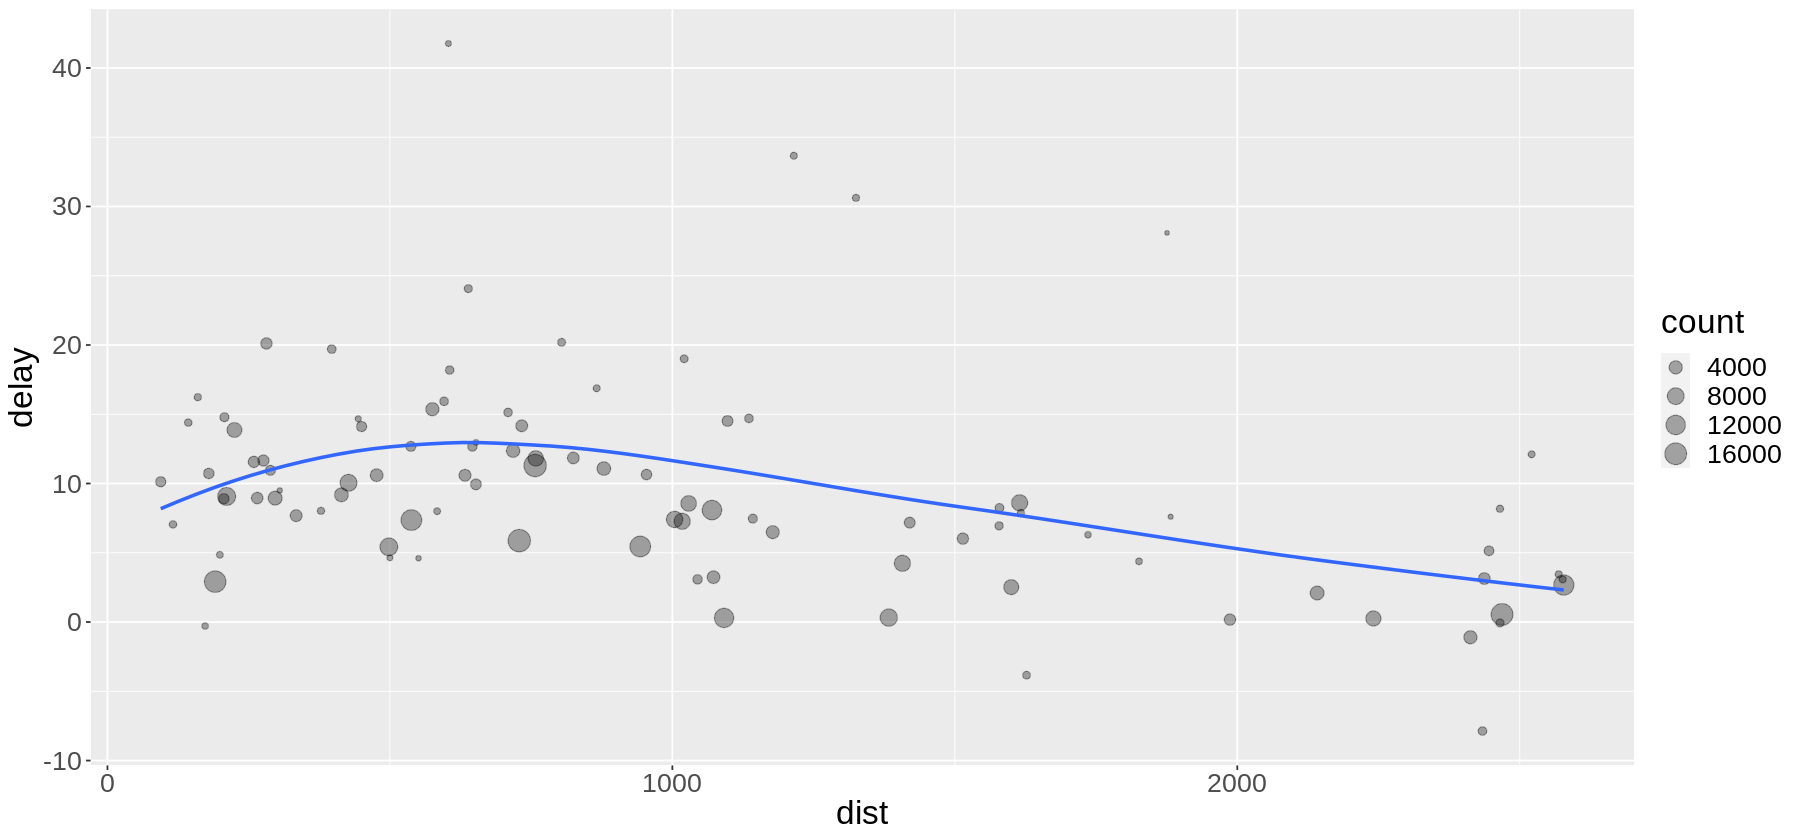

In [66]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(data = delays, mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)+
  theme(text = element_text(size=20))

### Valores perdidos, recuentos y funciones varias

Un parte importante de las funciones de agregación es el **na.rm=True** ¿qué pasaría si no lo agregamos? Puede que el resultado de la función de agregación sea un **NA** debido a un valor faltante. 

In [67]:
head(flights %>% 
  group_by(year, month, day) %>% 
  summarise(mean = mean(dep_delay)))

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,NA
2013,1,2,NA
2013,1,3,NA
2013,1,4,NA
2013,1,5,NA
2013,1,6,NA


Por supuesto la falta de valores es en sí información, como por ejemplo la falta de un valor debido a un vuelo cancelado, para ello podemos filtrar nuestro datos sin faltantes:

In [68]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [69]:
not_cancelled <- flights %>% 
  filter(!is.na(dep_delay), !is.na(arr_delay))

Si bien puede agrupar y combinar con lo que necesite, es posible que quiera normalizar los datos o trabajar con ellos conociendo las cantidades de los grupos. Es interesante ver como la falta de una escala nos puede dar información que se malinterprete

`summarise()` ungrouping output (override with `.groups` argument)



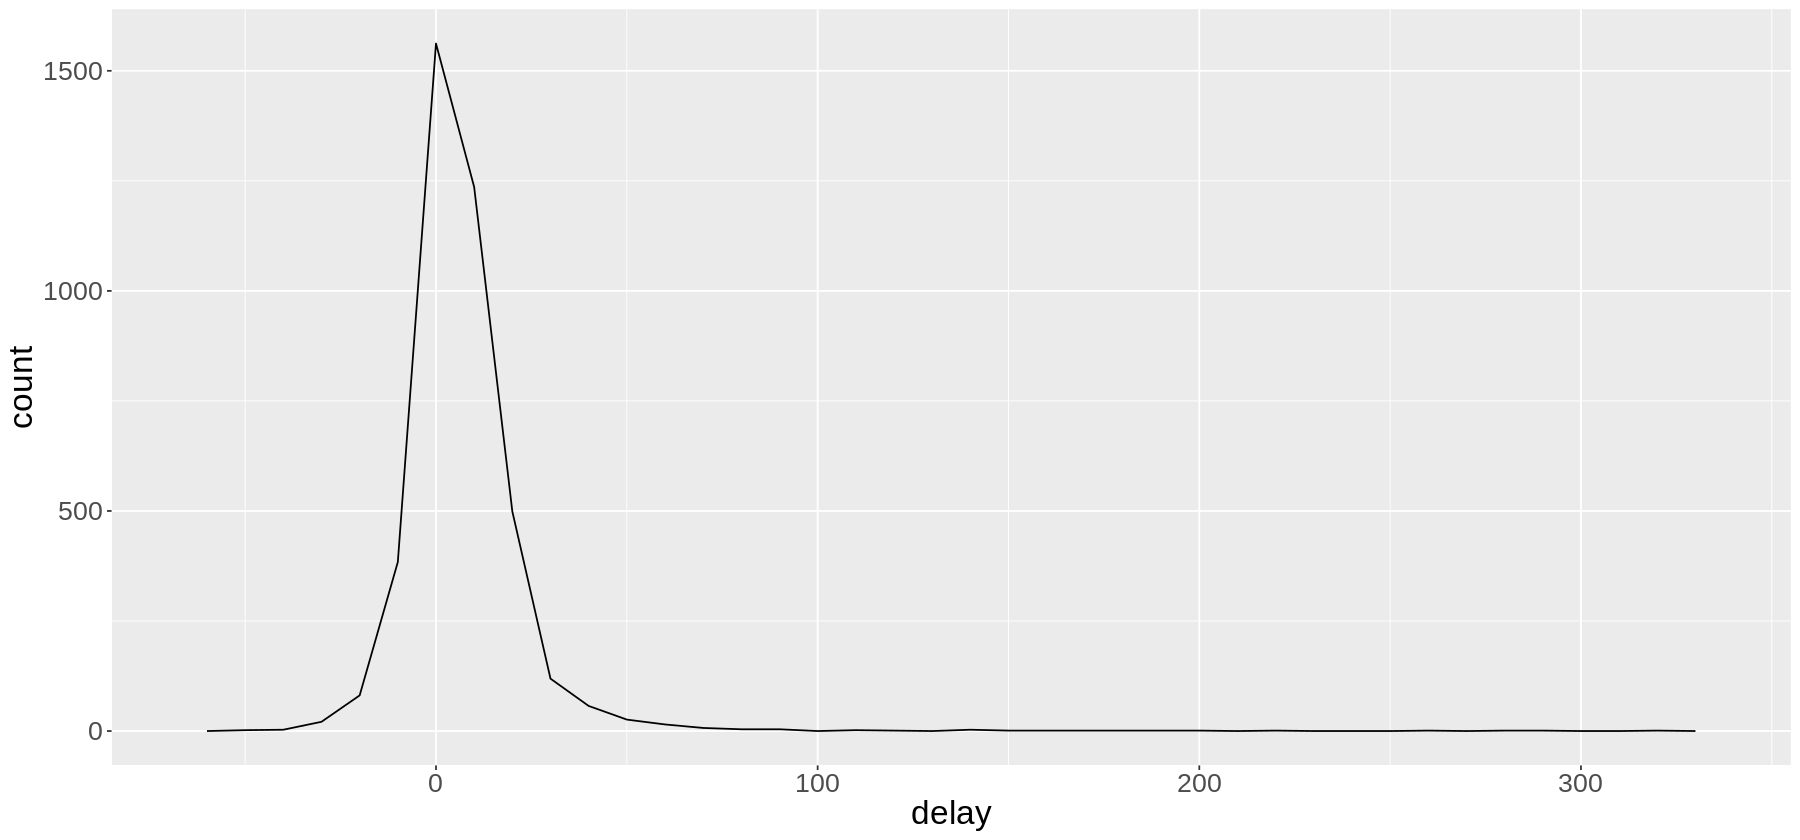

In [70]:
delays <- not_cancelled %>% 
  group_by(tailnum) %>% 
  summarise(
    delay = mean(arr_delay)
  )

ggplot(data = delays, mapping = aes(x = delay)) + 
  geom_freqpoly(binwidth = 10) +
  theme(text = element_text(size=20))

`summarise()` ungrouping output (override with `.groups` argument)



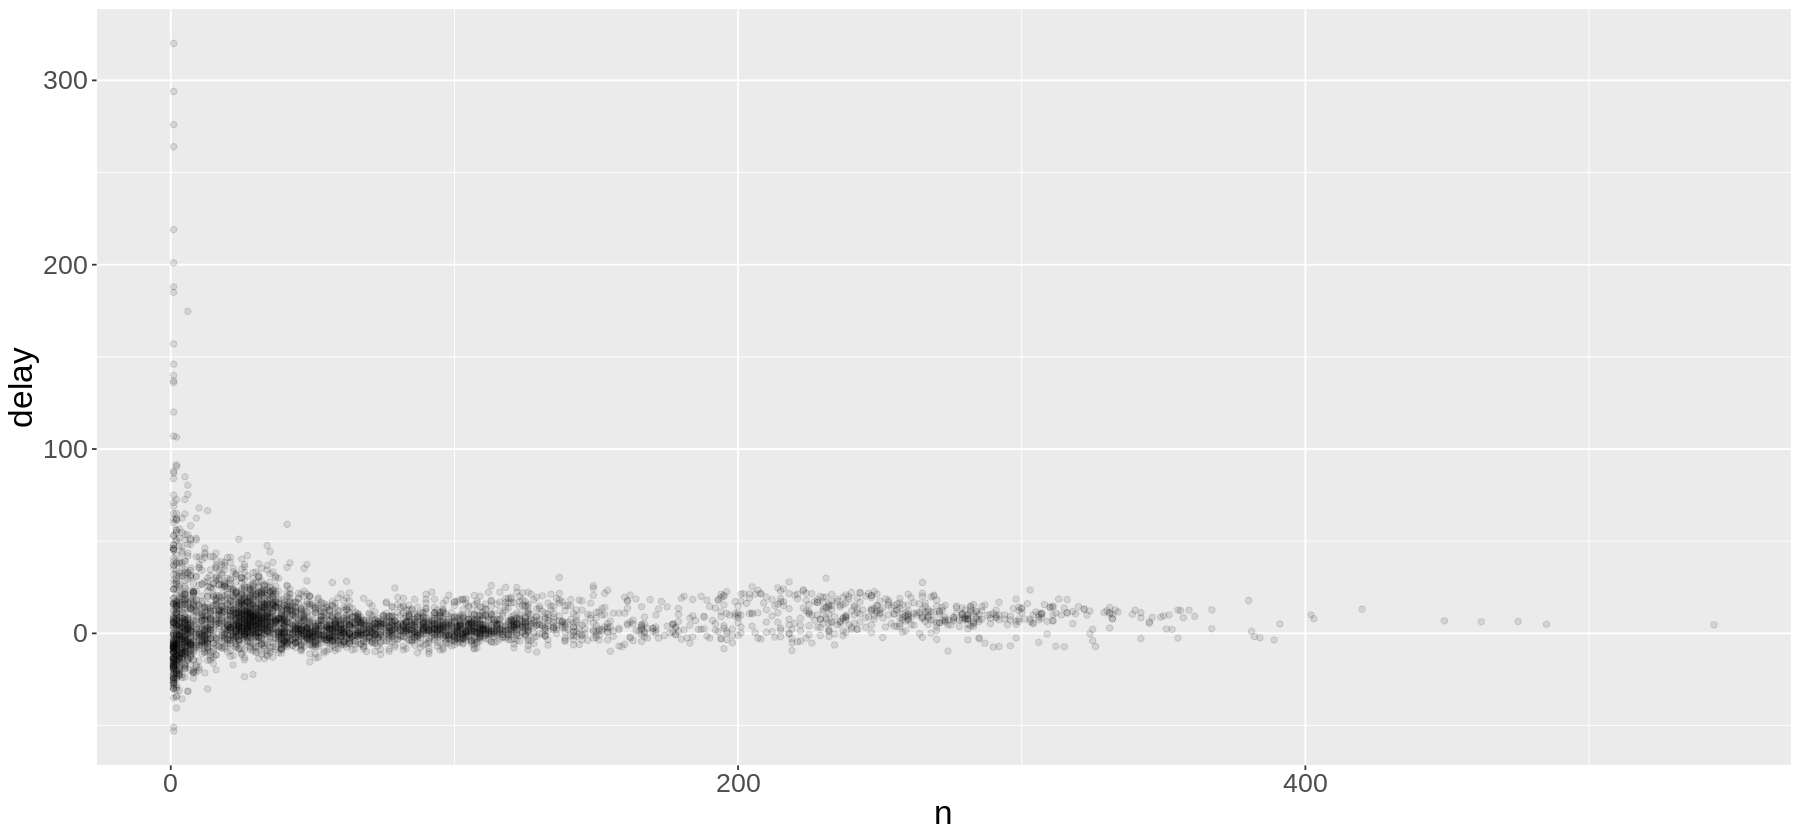

In [71]:
delays <- not_cancelled %>% 
  group_by(tailnum) %>% 
  summarise(
    delay = mean(arr_delay, na.rm = TRUE),
    n = n()
  )

ggplot(data = delays, mapping = aes(x = n, y = delay)) + 
  geom_point(alpha = 1/10) +
  theme(text = element_text(size=20))

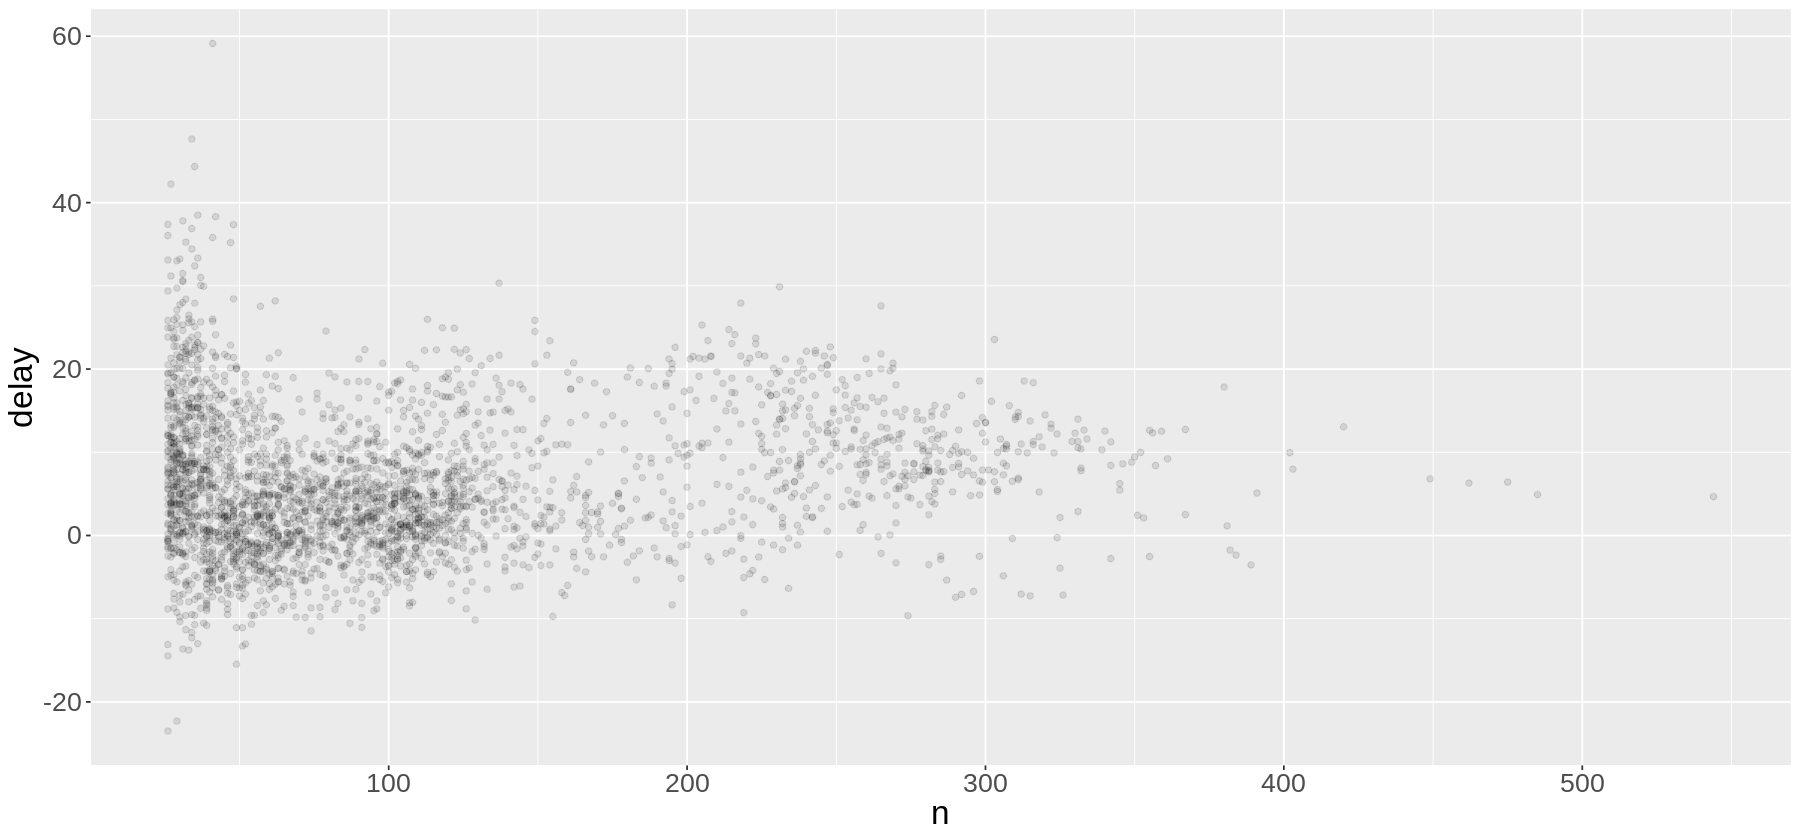

In [72]:
delays %>% 
  filter(n > 25) %>% 
  ggplot(mapping = aes(x = n, y = delay)) + 
    geom_point(alpha = 1/10) +
    theme(text = element_text(size=20))

Podemos combinar dentro de la **agrupación** y la **agregación** la selección de valores por **suconjuntos lógicos**

In [75]:
test <- not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(
    avg_delay1 = mean(arr_delay),
    avg_delay2 = mean(arr_delay[arr_delay > 0]) # the average positive delay
  )
head(test)

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



year,month,day,avg_delay1,avg_delay2
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,12.651023,32.48156
2013,1,2,12.692888,32.02991
2013,1,3,5.733333,27.66087
2013,1,4,-1.932819,28.30976
2013,1,5,-1.525802,22.55882
2013,1,6,4.236429,24.37270


También hay varias funciones más que podemos usar:

In [76]:
not_cancelled %>% 
  group_by(dest) %>% 
  summarise(
    distance_sd = sd(distance),
    distance_IQR = IQR(distance),
    distance_mad = mad(distance),
    distace_025 = quantile(distance, 0.25),
    distance_min = min(distance),
    distance_na = sum(!is.na(distance)),
    distance_n = n()
  ) %>% 
  arrange(desc(distance_sd))

`summarise()` ungrouping output (override with `.groups` argument)



dest,distance_sd,distance_IQR,distance_mad,distace_025,distance_min,distance_na,distance_n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
EGE,10.542765,21,1.4826,1726,1725,207,207
SAN,10.350094,21,0.0000,2425,2425,2709,2709
SFO,10.216017,21,0.0000,2565,2565,13173,13173
HNL,10.004197,20,0.0000,4963,4963,701,701
SEA,9.977993,20,0.0000,2402,2402,3885,3885
LAS,9.907786,21,0.0000,2227,2227,5952,5952
PDX,9.873299,20,0.0000,2434,2434,1342,1342
PHX,9.862546,20,0.0000,2133,2133,4606,4606
LAX,9.657195,21,0.0000,2454,2454,16026,16026


También se pueden hacer recuentos con usando la función count() y como vimos con `sum(!is.na)` podemos hacer operaciones de "conteo" con operadores lógicos. 

In [77]:
head(not_cancelled)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [78]:
head(not_cancelled %>% 
  count(tailnum, wt = distance))

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


In [79]:
head(not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(n_early = sum(dep_time < 500)))

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



year,month,day,n_early
<int>,<int>,<int>,<int>
2013,1,1,0
2013,1,2,3
2013,1,3,4
2013,1,4,3
2013,1,5,3
2013,1,6,2



Cuando agrupa por múltiples variables, **cada resumen despega un nivel de la agrupación**. Eso facilita la acumulación progresiva de un conjunto de datos. Tenga cuidado al acumular resúmenes progresivamente, está bien para sumas y recuentos, pero debe pensar en los medios de ponderación y las variaciones.

In [80]:
daily <- group_by(flights, year, month, day)
per_day   <- summarise(daily, flights = n())
per_month <- summarise(per_day, flights = sum(flights))
per_year  <- summarise(per_month, flights = sum(flights))
per_year

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



year,flights
<int>,<int>
2013,336776


## Mutate() y filter()

La agrupación es más útil junto con summarise(), pero también puede realizar operaciones convenientes con mutate()y filter(). Por ejemplo:

1. Encuentra aquellos vuelos por fecha que tuvieron mayor retraso

2. Encuentra todos los grupos más grande que cierto umbral

3. Aplica una normalización a los datos

In [81]:
topten <- flights %>% 
  group_by(year, month, day) %>%
  filter(rank(desc(arr_delay)) < 10) # desc -> descending order

popular_dests <- flights %>% 
  group_by(dest) %>% 
  filter(n() > 365)

popular_dests_n <- popular_dests %>% 
  filter(arr_delay > 0) %>% 
  mutate(prop_delay = arr_delay / sum(arr_delay)) %>% 
  select(year:day, dest, arr_delay, prop_delay)

#Ejercicios de agrupaciones

In [ ]:
install.packages("Lahman")
library(Lahman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Ejercicio 1 

Veamos cómo el rendimiento promedio de los bateadores en el béisbol está relacionado con la cantidad de veces que están bateando. Usemos los datos paquete Lahman para calcular el promedio de bateo (número de golpes / número de intentos) de cada jugador de béisbol de las grandes ligas y **grafiquemos**


In [ ]:
#@title Solución **acá**

if (F){
batting <- as_tibble(Lahman::Batting)

batters <- batting %>% 
  group_by(playerID) %>% 
  summarise(
    ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    ab = sum(AB, na.rm = TRUE)
  )

batters %>% 
  filter(ab > 100) %>% 
  ggplot(mapping = aes(x = ab, y = ba)) +
    geom_point() + 
    geom_smooth(se = FALSE) +
    theme(text = element_text(size=20))
}

## Ejericicio 2
Mira la cantidad de vuelos cancelados por día. ¿Hay un patrón? ¿La proporción de vuelos cancelados está relacionada con el retraso promedio?


In [ ]:
#@title Solución **acá**

cancelled <-flights %>%
  group_by(year, month, day) %>%
  summarise(
    cancelled_n = sum(is.na(dep_delay) |is.na(arr_delay)),
    delay = mean(arr_delay, na.rm = TRUE),
    delay_n = sum(arr_delay>0,na.rm = TRUE),
    total_n = n()
  ) 

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



Tome por cada hora los 10 peores retrasos y halle el mayor por cada hora y organice. 




In [ ]:
#@title Solución **acá**
top_hours <-flights %>%
  group_by(hour) %>%
  filter(rank(desc(arr_delay))<10)%>%
  summarise(
    max_delay = max(arr_delay,rm.na =T)
  )

#arrange(top_hours,desc(max_delay))

   

`summarise()` ungrouping output (override with `.groups` argument)

